# Q1

In [69]:
import pandas as pd
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [72]:

import tensorflow as tf
from sklearn.model_selection import train_test_split

In [105]:
#load data
df = pd.read_csv('spam.csv', encoding='latin1')
stop_words = set(stopwords.words('english'))

In [74]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

In [75]:
def tokenize_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    return tokens

In [76]:
#Preprocessing
df['text'] = df['v2'].apply(preprocess)
display(df[['v2','text']][:5])


v2  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                                text  
0  go until jurong point crazy available only in ...  
1                            ok lar joking wif u oni  
2  free entry in  a wkly comp to win fa cup final...  
3        u dun say so early hor u c already then say  
4  nah i dont think he goes to usf he lives aroun...

In [77]:
#tokenization
df['token'] = df['text'].apply(tokenize_stopwords)
display(df[['text','token']][:5])

text  \
0  go until jurong point crazy available only in ...   
1                            ok lar joking wif u oni   
2  free entry in  a wkly comp to win fa cup final...   
3        u dun say so early hor u c already then say   
4  nah i dont think he goes to usf he lives aroun...   

                                               token  
0  [jurong, point, crazy, available, bugis, great...  
1                            [lar, joking, wif, oni]  
2  [free, entry, wkly, comp, win, cup, final, tkt...  
3               [dun, say, early, hor, already, say]  
4  [nah, dont, think, goes, usf, lives, around, t...

In [78]:
#Numericakl featurwes
df['clean_text'] = [' '.join(tokens) for tokens in df['token']]
X = df['clean_text']
y = df['v1']

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)
print("Feature Matrix shape:", X_tfidf.shape)

Feature Matrix shape: (5572, 8158)


# Q2

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2)
print(X_train)
print(X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34075 stored elements and shape (4457, 8158)>
  Coords	Values
  (0, 2839)	0.27591998549051155
  (0, 3187)	0.3229431518374398
  (0, 12)	0.3962976917687803
  (0, 1642)	0.2407173608311867
  (0, 7859)	0.4011266316794616
  (0, 5537)	0.44488427978319445
  (0, 7344)	0.49573639864417784
  (1, 1319)	0.3008388132173874
  (1, 2510)	0.4345639206797876
  (1, 7074)	0.4677210930931913
  (1, 1158)	0.49811137634387315
  (1, 443)	0.5037581196744008
  (2, 3878)	0.2127738640511394
  (2, 3175)	0.3287383131950102
  (2, 8082)	0.25797278727420303
  (2, 7808)	0.35038900838888254
  (2, 6599)	0.33841555408003526
  (2, 1070)	0.33841555408003526
  (2, 966)	0.3089403349396292
  (2, 7649)	0.3206167119491465
  (2, 4942)	0.3471200332694659
  (2, 2304)	0.3309898631731779
  (3, 7690)	0.44655682771988137
  (3, 3981)	0.20411118556830987
  (3, 5631)	0.2277405148030422
  :	:
  (4452, 3818)	0.3881874778432028
  (4453, 960)	0.1689279378911891
  (4453, 4036)	0.21546

In [84]:
model = MultinomialNB()
history = model.fit(X_train, y_train)

In [85]:
#prediction
preds = model.predict(X_test)
display(preds)

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [86]:
print("Accuracy:", model.score(X_test, y_test))
print(classification_report(y_test, preds))

Accuracy: 0.9650224215246637
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       977
        spam       1.00      0.72      0.84       138

    accuracy                           0.97      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.97      0.97      0.96      1115



In [103]:
##Observation:
#From weighted avg f1-score we can see that model is performing good for ham class but not good for spam class.

# Q3

In [87]:
#loading images
images, labels = [], []
for label, cls in enumerate(['no', 'yes']):
    for img in os.listdir(f'brain_tumor_dataset/{cls}'):
        img_arr = cv2.imread(f'brain_tumor_dataset/{cls}/{img}')
        if img_arr is not None:
            img_norm = cv2.resize(img_arr, (224, 224))
            img_res = img_norm/ 255.0
            images.append(img_res)
            labels.append(label)
images, labels = np.array(images), np.array(labels)


In [88]:
#shape of the image
print(f"Total images loaded: {len(images)}")
print(f"Image shape: {images[0].shape}")
print(f"Pixel range: [{images.min():.2f}, {images.max():.2f}]")

Total images loaded: 253
Image shape: (224, 224, 3)
Pixel range: [0.00, 1.00]


In [92]:
#normalization output
print(img_norm)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [96]:
#reshaped output
print(img_res.shape)

(224, 224, 3)


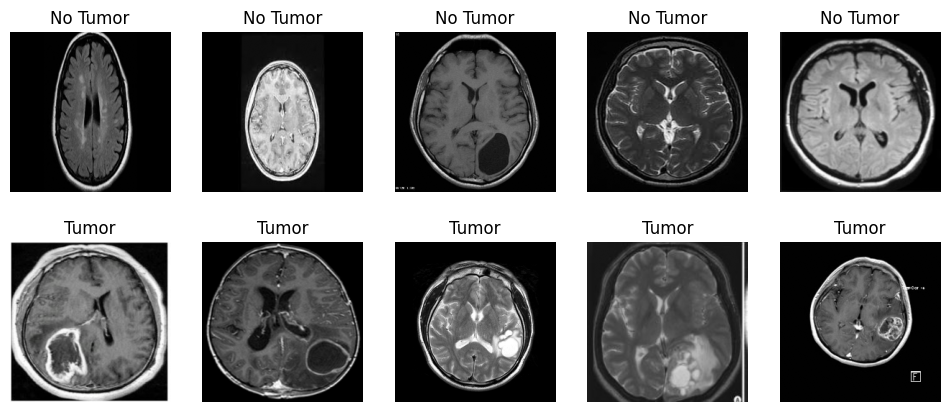

In [97]:
# Visualize first 5 from each class
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i in range(5):
    axes[0, i].imshow(images[np.where(labels==0)[0][i]])
    axes[0, i].set_title('No Tumor')
    axes[0, i].axis('off')
    axes[1, i].imshow(images[np.where(labels==1)[0][i]])
    axes[1, i].set_title('Tumor')
    axes[1, i].axis('off')
plt.show()

# Q4

Found 253 files belonging to 2 classes.
Using 203 files for training.


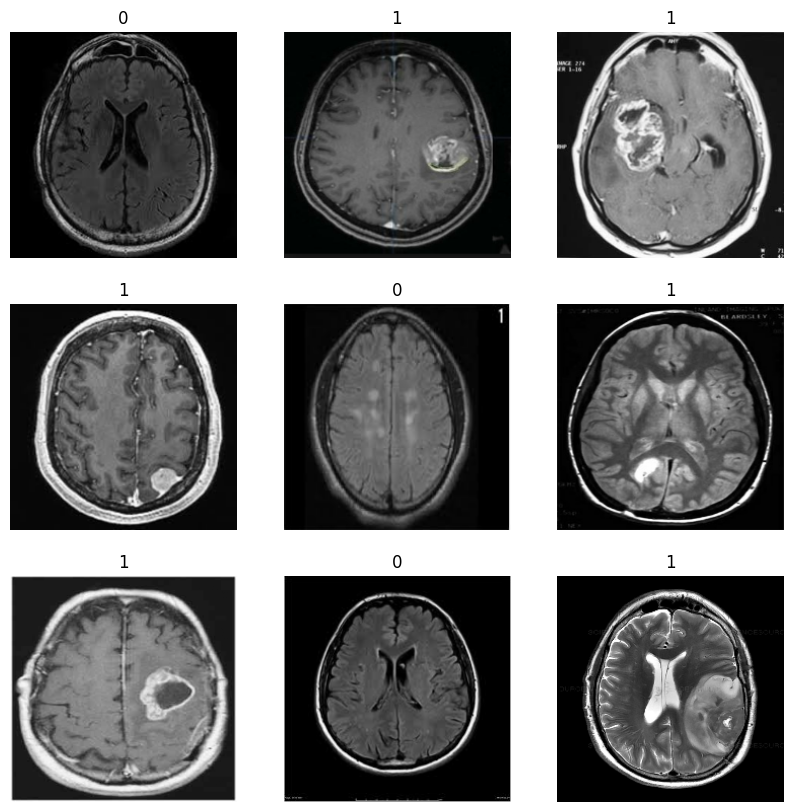

In [98]:
import tensorflow as tf
import matplotlib.pyplot as plt

dataset pipeline
dataset_dir = 'brain_tumor_dataset/'
batch_size = 32
img_size = (224, 224)

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Normalized and prepared for CNN
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))

# Visualizing first batch
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(str(labels[i].numpy()))
        plt.axis('off')
plt.show()

In [99]:
# validation dataset
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))



Found 253 files belonging to 2 classes.
Using 50 files for validation.


In [100]:
# CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
display(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

None

In [101]:
# Training
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5
)
history


Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.5160 - loss: 0.8697 - val_accuracy: 0.8000 - val_loss: 0.5394
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.7991 - loss: 0.5437 - val_accuracy: 0.8000 - val_loss: 0.6473
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.8248 - loss: 0.4372 - val_accuracy: 0.8000 - val_loss: 0.5515
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.7832 - loss: 0.4345 - val_accuracy: 0.8200 - val_loss: 0.6025
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.8054 - loss: 0.3695 - val_accuracy: 0.8400 - val_loss: 0.5744


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step - accuracy: 0.8725 - loss: 0.5246
Test accuracy: 0.8400


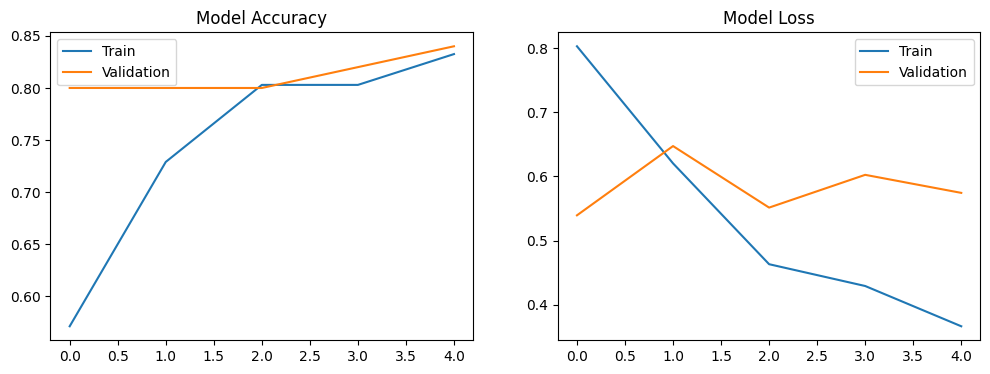

In [102]:
# Evaluation
test_loss, test_acc = model.evaluate(val_dataset)
print(f"Test accuracy: {test_acc:.4f}")

# training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.legend()
plt.show()

In [104]:
##remarks
#Difference between training accuracy and val accuracy is becoming less as it is going in the next epoch